# Machine Learning with Python: Random Forest Model

## Introduction

Python is a very popular language for the implementation of Machine Learning (ML) algorithms. In this notebook, we are going to learn how to train and test a **Random Forest (RF)** model. A RF is a supervised ML algorithm capable to perform regression and classification tasks. RF is an ensemble predictor based on an ensemble of decision trees. To implement this ML algorithm we will be using the python library `scikit-learn`. 


### Step 1 - Read input features and targets


In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
file_path = r"Bangladesh_Event1_Complete.csv"
df = pd.read_csv(file_path)

# Check if the required columns exist
required_columns = ["VV", "VH", "Landcover", "Elevation", "Slope"]
for column in required_columns:
    if column not in df.columns:
        raise ValueError(f"Missing column: {column}")
    
# Extract features and target variable
features = ["VV", "VH", "Landcover", "Elevation", "Slope"] # features = ["VV", "VH", "Landcover", "Elevation", "Slope"]
X = df[features].values
Y = df["Flooded"].values  # Flooded (1) / Non-flooded (0)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Train a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=185, # default is 100 - Opinions vary on the best number of trees
    max_features="sqrt", #chooses the strongest
    min_samples_split=3, # default is 2 - minimum number of samples required to split an internal node
    max_depth=28, # default is None - maximum depth of the tree
    max_leaf_nodes=None, # default is None - maximum number of leaf nodes
    min_samples_leaf=3, # default is 1
    random_state=42 # default is None
)

rf_model.fit(X_train, Y_train)



RandomForestClassifier(max_depth=28, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=185, random_state=42)

### Step 2 - Split the data set into training and testing sets

Now let's split the data set into training (80%) and testing (20%) and save the data points into new variables.  We use 80%-20%, but it is up to you to decide what should be the split.  We will also plot the correlation matrix among features and target to see if there is any correlation among them.


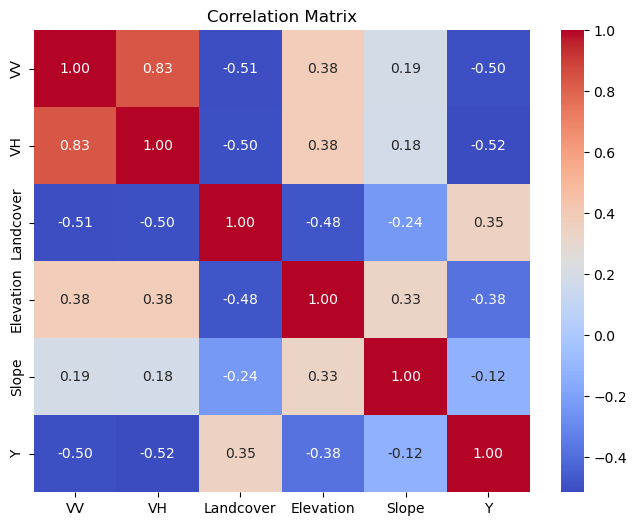

                 VV        VH  Landcover  Elevation     Slope         Y
VV         1.000000  0.834862  -0.506638   0.382129  0.186616 -0.501042
VH         0.834862  1.000000  -0.497963   0.384056  0.180893 -0.515440
Landcover -0.506638 -0.497963   1.000000  -0.481288 -0.235747  0.346853
Elevation  0.382129  0.384056  -0.481288   1.000000  0.332764 -0.379518
Slope      0.186616  0.180893  -0.235747   0.332764  1.000000 -0.124514
Y         -0.501042 -0.515440   0.346853  -0.379518 -0.124514  1.000000


In [3]:
# Create a DataFrame for the training data
df_train = pd.DataFrame(X_train, columns=features)
df_train['Y'] = Y_train

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix
correlation_matrix = df_train.corr()
print(correlation_matrix)


### Step 4: Use the model to make predictions 

Now let's test the model with the testing data and plot the results.  


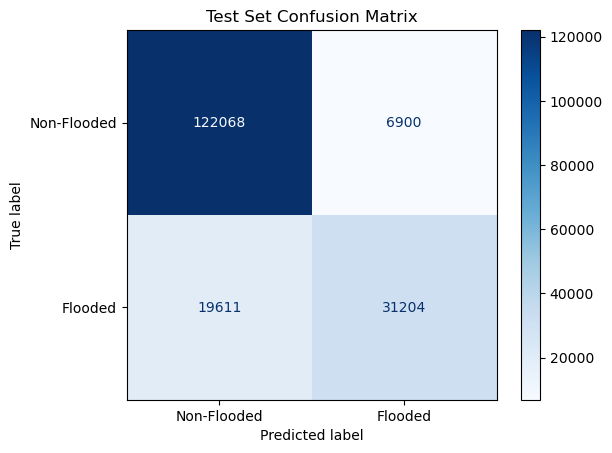

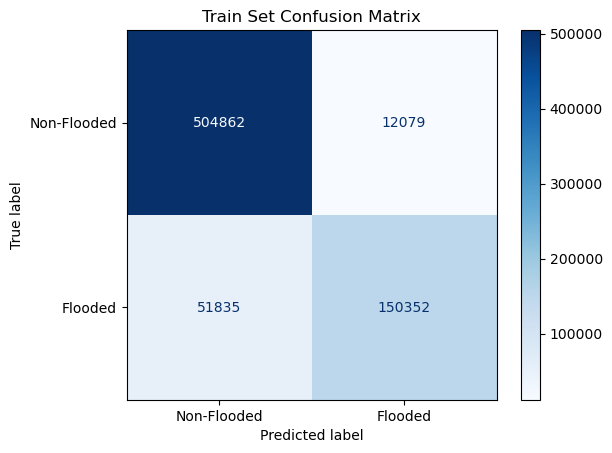

In [4]:
# Step 4: Make predictions on the test set
Y_pred_test = rf_model.predict(X_test)  # Ensure consistency in variable naming

# Step 4: Make predictions on the train set
Y_pred_train = rf_model.predict(X_train)  # Ensure consistency in variable naming


# Step 5: Evaluate the model
cm_test = confusion_matrix(Y_test, Y_pred_test)
cm_train = confusion_matrix(Y_train, Y_pred_train) 

# Function to plot confusion matrix without scientific notation
def plot_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Flooded', 'Flooded'])
    fig, ax = plt.subplots()
    disp.plot(cmap='Blues', ax=ax, values_format='d')  # 'd' ensures integer display
    plt.title(title)
    plt.show()

# Plot the matrices
plot_confusion_matrix(cm_test, 'Test Set Confusion Matrix')
plot_confusion_matrix(cm_train, 'Train Set Confusion Matrix')

### Step 5: Evaluate the model performance 


In [5]:
# Step 5: Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

accuracy = accuracy_score(Y_test, Y_pred_test)
precision = precision_score(Y_test, Y_pred_test)
recall = recall_score(Y_test, Y_pred_test)
f1 = f1_score(Y_test, Y_pred_test)
kappa = cohen_kappa_score(Y_test, Y_pred_test)

accuracy1 = accuracy_score(Y_train, Y_pred_train)
precision1 = precision_score(Y_train, Y_pred_train)
recall1 = recall_score(Y_train,Y_pred_train)
f11 = f1_score(Y_train, Y_pred_train)
kappa1 = cohen_kappa_score(Y_train, Y_pred_train)



print(f"Accuracy: {accuracy:.4f}") ## Measures the proportion of correctly classified samples. OVerall accuracy
print(f"Precision: {precision:.4f}")  ## how many of the predictive positive samples are actually positive. User Accuracy
print(f"Recall: {recall:.4f}") ## Measures how many actual positive samples are correctly identified.  Producer Accuracy
print(f"F1 Score: {f1:.4f}") ## Harmonic mean of precision and recall (best for imbalanced datasets). F1
print(f"kappa: {kappa:.4f}") ## Measures agreement between predicted and actual classes. Kappa
print("-----")

print(f"Overall Accuracy: {accuracy1:.4f}") ## Measures the proportion of correctly classified samples.
print(f"Precision1: {precision1:.4f}")  ## how many of the predictive positive samples are actually positive
print(f"Recall1: {recall1:.4f}") ## Measures how many actual positive samples are correctly identified. 
print(f"F11 Score: {f11:.4f}") ## Harmonic mean of precision and recall (best for imbalanced datasets).
print(f"kappa: {kappa1:.4f}") ## Measures agreement between predicted and actual classes.



Accuracy: 0.8525
Precision: 0.8189
Recall: 0.6141
F1 Score: 0.7019
kappa: 0.6065
-----
Overall Accuracy: 0.9111
Precision1: 0.9256
Recall1: 0.7436
F11 Score: 0.8247
kappa: 0.7661


### Step 6: Feature Importance

Evaluate the feature importance of your model. The code looks like this: 

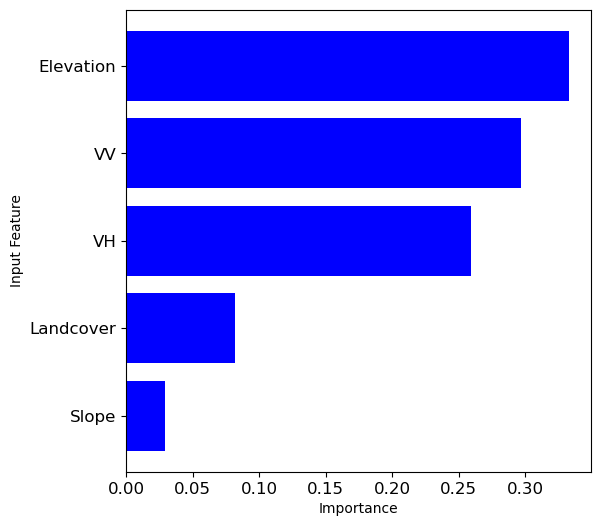

     Feature  Importance
3  Elevation    0.332623
0         VV    0.296948
1         VH    0.259411
2  Landcover    0.082020
4      Slope    0.028999


In [6]:
# Step 6: Feature importance
import pandas as pd
import matplotlib.pyplot as plt

# Use the actual feature names
feature_names = features  # Ensure features list is defined earlier
importances = rf_model.feature_importances_  # Fixed model reference

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(6, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Input Feature')  # Added for clarity

# Increase font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# Print feature ranking
print(feature_importance_df)


https://www.sciencedirect.com/science/article/pii/S0924271611001304
https://www.sciencedirect.com/science/article/pii/S0957417419303574
https://www.nature.com/articles/s41598-024-60066-x#:~:text=On%20the%20Landsat%20dataset%2C%20the,a%20Kappa%20coefficient%20of%200.875.

